# KNN from scratch

## In this code I implement the KNN algorithm from scratch using the OOP paradigm 

In [40]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Model Class

In [90]:
# distance between two-dimensional vectors
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# build the KNN class
class model:
    
    # compare to k neareast points
    def __init__(self, k):
        self.k = k

    # assign training data    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # array of predicted value for each data points    
    def predict(self, X):
        preds = [self.predict_class(x) for x in X]
        return np.array(preds)

    def predict_class(self, x):
        
        # distances between x and all data points in the training set
        distances = [distance(x, x_train) for x_train in self.X_train]
        
        # Sort by distance and return indices of the first k neighbors with shortest distance 
        k_idx_val = np.argsort(distances)[:self.k]
        
        # get the labels of the k nearest neighbor training samples using the index values
        labels = [self.y_train[i] for i in k_idx_val]
        
        # get the mode using the counter function
        mode = Counter(labels).most_common(1)
        
        # return the first mode if the are more than one
        return mode[0][0]
    

## Testing the model on a dataset 

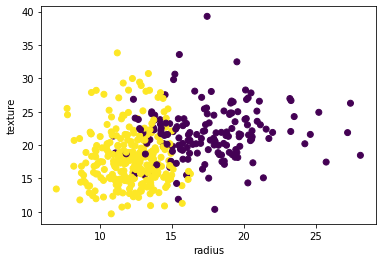

In [91]:
# import the data
data = datasets.load_breast_cancer()

# assign and separate to train and test
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# plot the first two features for visualisation
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel('radius')
plt.ylabel('texture')
plt.show()

In [92]:
# function for the accuracy of the model
def accuracy(y_true, preds):
    accuracy = (y_true == preds).mean()
    return accuracy

# apply the model to the data and evaluate the accuracy
knn = model(k=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("Accuracy of model:", accuracy(y_test, predictions)*100,'%')

Accuracy of model: 91.22807017543859 %


## Very good accuracy! 

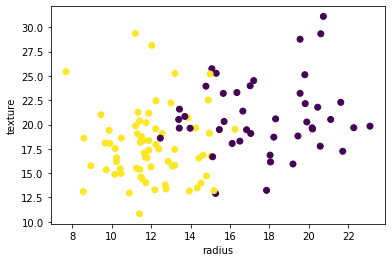

In [93]:
# plot the predictions
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1],c=predictions)
plt.xlabel('radius')
plt.ylabel('texture')
plt.show()

## The data points look to be in a reasonable location compared to the the training examples above.